In [1]:
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
def chordTransitionDict(df,column):
    chords=df[column].unique()
    chords=chords[chords != "NC"]
    stats={"init" : {key : 0 for key in chords}, "transition" : {currentChord : {nextChord : 0 for nextChord in chords} for currentChord in chords}, "end" : {key : 0 for key in chords}}
    n=len(df)
    if df[column][0]!="NC":   
        stats["init"][df[column][0]]=1
    for i in range(n-1):
        if df["title"][i]==df["title"][i+1]:
            if df[column][i]!="NC" and df[column][i+1]!="NC":
                stats["transition"][df[column][i]][df[column][i+1]]+=1
        else:
            if df[column][i]!="NC":
                stats["end"][df[column][i]]+=1
            if df[column][i+1]!="NC":
                stats["init"][df[column][i+1]]+=1
    if df[column][n-1]!="NC":   
        stats["end"][df[column][n-1]]+=1
    return stats
                

In [3]:
def convertToPercent(dico):
    dicoPercent=deepcopy(dico)
    ninit=sum(dicoPercent["init"].values())
    dicoPercent["init"]={key: round(value/max(ninit,1),2) for key, value in dicoPercent["init"].items()}
    for key in dicoPercent["transition"].keys():
        ntrans=sum(dicoPercent["transition"][key].values())
        #print(key,ntrans)
        dicoPercent["transition"][key]={key: round(value/max(ntrans,1),2) for key, value in dicoPercent["transition"][key].items()}
    nend=sum(dicoPercent["end"].values())
    dicoPercent["end"]={key: round(value/max(nend,1),2) for key, value in dicoPercent["end"].items()}
    return dicoPercent

In [4]:
def plotHistogram(dico,showValueOnBar=True,savefig="",spacing=1,width=1,figsize=(10,4)):
    values,keys= map(list, zip(*sorted(zip(dico.values(),dico.keys()), reverse=True)))
    plt.figure(figsize=figsize)
    plt.bar([i+(i*spacing) for i in range(len(keys))], values, width=width,edgecolor='black')
    plt.xticks([i + (i*spacing) for i in range(len(keys))], keys)
    if showValueOnBar:
        for i in range(len(keys)):
            plt.text(i + (i*spacing), values[i], str(values[i]), ha='center', va='bottom')
    if savefig!="":
        plt.savefig(savefig)
    plt.show()

In [5]:
df = pd.read_csv("choro.tsv", sep="\t",usecols=["root","title","chord","global_key"])
print(df["root"][len(df)-1])

C


In [6]:
out_file = open("../Statistic/statsRoot.json", "w") 
json.dump(chordTransitionDict(df,"root"), out_file, indent = 6) 
out_file.close()
out_file = open("../Statistic/statsChord.json", "w") 
json.dump(chordTransitionDict(df,"chord"), out_file, indent = 6) 
out_file.close()

In [7]:
f = open('../Statistic/statsRoot.json',) 
stats = json.load(f) 
f.close() 
statsPercent=convertToPercent(stats)

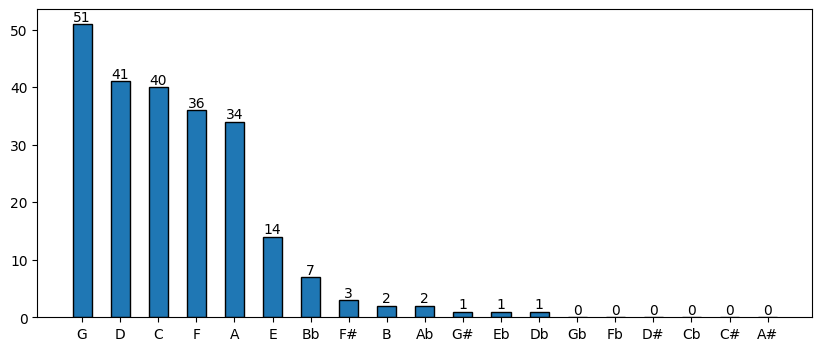

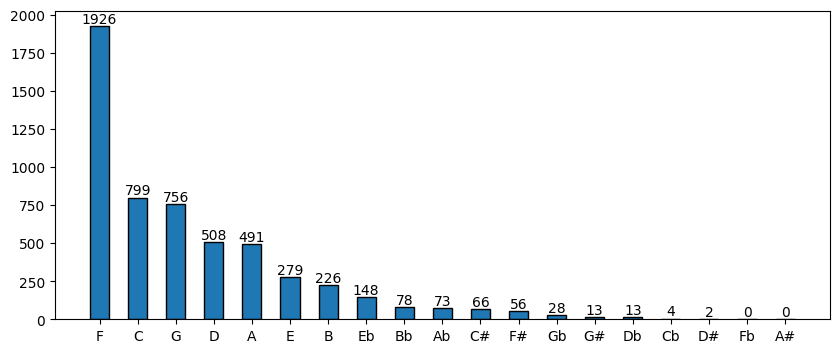

In [64]:
plotHistogram(stats["init"])
plotHistogram(stats["transition"]["C"])

In [61]:
def globalKeyCount(df,savefig=""):
    global_keys=df["global_key"].unique()
    global_key_count={key : 0 for key in global_keys}
    global_key_count[df["global_key"][0]]+=1
    for i in range(len(df)-1):
        if df["title"][i]!=df["title"][i+1]:
            global_key_count[df["global_key"][i+1]]+=1
    n=sum(global_key_count.values())
    print("Nombre de partitions : " + str(n))
    global_key_count={key: value/max(n,1) for key, value in global_key_count.items()}
    plotHistogram(global_key_count,showValueOnBar=False,savefig=savefig)
    return global_key_count

Nombre de partitions : 295


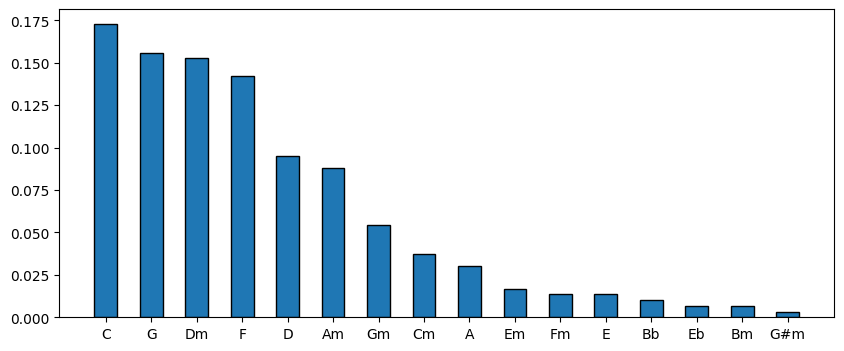

{'F': 0.1423728813559322,
 'Cm': 0.03728813559322034,
 'C': 0.17288135593220338,
 'G': 0.15593220338983052,
 'Am': 0.08813559322033898,
 'D': 0.09491525423728814,
 'A': 0.030508474576271188,
 'Dm': 0.15254237288135594,
 'Gm': 0.05423728813559322,
 'Fm': 0.013559322033898305,
 'Em': 0.01694915254237288,
 'Bb': 0.010169491525423728,
 'Eb': 0.006779661016949152,
 'E': 0.013559322033898305,
 'Bm': 0.006779661016949152,
 'G#m': 0.003389830508474576}

In [62]:
globalKeyCount(df,savefig="globalKey.png")